# Group Project 

## Introdution

Understanding the factors that drive players to engage with game-related context beyond the game can provide valuable insights for game developers and marketers. In particular, being able to predict whether players will subscribe to newsletters based on their demographic characteristics and their in-game behavior can help improve player promotion strategies and support retention efforts.

The purpose of this project is to investigate the relationship between a variety of player characteristics and the likelihood of subscribing to game-related newsletters. Specifically, we explore **whether player experience level, total play time, gender, and age are significant explanatory variables of a player's decision to subscribe to a game-related newsletter, and how do these characteristics differ across player types?**

**Data Description:** <br>
The data used in this project comes from a provided dataset called players.csv, which contains detailed demographic and players’ profile information, including their self-reported gender, age, experience level, and time spent playing. 

By using this dataset, we aim to create a comprehensive profile of the players. The dataset was carefully cleaned and prepared to ensure that there were no missing values or inconsistencies that would affect the results. The player dataset provides demographic attributes that provide a comprehensive basis for analysis.

The key response variable for our classification analysis is subscribe, which is a binary indicator of whether a player subscribes to a newsletter (either True or False). The goal is to use classification models (specifically KNN) to determine which selected explanatory variables will best predict this outcome. 

With the accuracy, precision, and recall of these explanatory variables, we hope to provide actionable insights to help optimize targeted communication and engagement strategies for the player community.

## Method

1. Data Loading and Wrangling <br>
- Start by importing and cleaning the dataset players.csv.
- Select only the important variables relevant to the research question: the corresponding variable subscribe and the predictor variables experience, played_hours, gender, and age. we filtered out rows with missing or invalid data.
- The categorical variables therein were converted to factors to ensure proper processing during the categorization process.

2. Data Visualization <br>
To explore the relationship between our explanatory variables and the response variable (subscribe), the following charts are created:
- Played Minutes by Subscription Status
- Age by Subscription Status
- Gender by Subscription Status
- Experience by Subscription Status

3. Modelling: Classification on Subscribe <br>
KNN classification models were implemented using tidymodels to predict newsletter subscriptions status based on each explanatory variable.
- For model tuning, the data were split into a training set (80%) and a testing set (20%), and then stratified by subscribe.
- The 5-fold cross-validation was applied to the training set and the k-parameter was adjusted in steps of 5. 
- The accuracy, precision and recall of the classification of each explanatory variable is evaluated to compare the predictive capability of each characteristic.

4. Visualize how each feature differ between various player types <br>
- The experience level was used as the x variable and each of the other key characteristics (for example played_hour, age and gender) were plotted against it.
- For each graph, color coding was performed based on subscribe to visualize how the subscription status varied within each experience level. 
- This allows for the examination of differences in player characteristics across player types and also the interaction between subscription status and these differences. 

## Result

In [1]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Data Wrangling

In [2]:
url<-"https://raw.githubusercontent.com/Riceparticlee/dsci_group_minecraft/refs/heads/main/players%20(1).csv"
players<-read_csv(url)|>
mutate(hashedEmail=NULL)|>
mutate(name=NULL)|>
rename(played_minutes=played_hours)|>
mutate(played_minutes=played_minutes*60)|>
mutate(subscribe=as_factor(subscribe))|>
mutate(experience=as_factor(experience))|>
mutate(gender=as_factor(gender))

head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_minutes,gender,Age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,TRUE,1818,Male,9
Veteran,TRUE,228,Male,17
Veteran,FALSE,0,Male,17
Amateur,TRUE,42,Female,21
Regular,TRUE,6,Male,21
Amateur,TRUE,0,Female,17


### Data Summary

In [3]:
subscribe_count<-players|>
group_by(subscribe)|>
count()

subsribe_percentage<-subscribe_count|>
mutate(percentage=n/196*100)
subsribe_percentage

experience_count<-players|>
group_by(experience)|>
count()

experience_percentage<-experience_count|>
mutate(percentage=n/196*100)
experience_percentage

gender_count<-players|>
group_by(gender)|>
count()

gender_percentage<-gender_count|>
mutate(percentage=n/196*100)
gender_percentage

mean_played_time<-players|>
summarize("Mean Played Time in Minutes"=mean(played_minutes, na.rm=TRUE))

mean_age<-players|>
summarize("Mean Age"=mean(Age, na.rm=TRUE))

mean_table<-cbind(mean_age,mean_played_time)
mean_table


subscribe,n,percentage
<fct>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


experience,n,percentage
<fct>,<int>,<dbl>
Pro,14,7.142857
Veteran,48,24.489796
Amateur,63,32.142857
Regular,36,18.367347
Beginner,35,17.857143


gender,n,percentage
<fct>,<int>,<dbl>
Male,124,63.2653061
Female,37,18.8775510
Non-binary,15,7.6530612
Prefer not to say,11,5.6122449
Agender,2,1.0204082
Two-Spirited,6,3.0612245
Other,1,0.5102041


Mean Age,Mean Played Time in Minutes
<dbl>,<dbl>
20.52062,350.7551


The players in these servers have a mean age of 20.5 years; among all 196 players, 73.5% subscribed to the game. The gender distribution of the players is as follows: 63.27% male, 18.87% female, and 17.83% preferred not to say or identify as agender, non-binary, two-spirited, or other.
Regarding player experience levels, 32% are Amateurs, 17% are Beginners, 7% are Pros, 18% are Regulars, and 24% are Veterans.

### Data Visualization

##### Distribution of Played Hours by Subscription Status

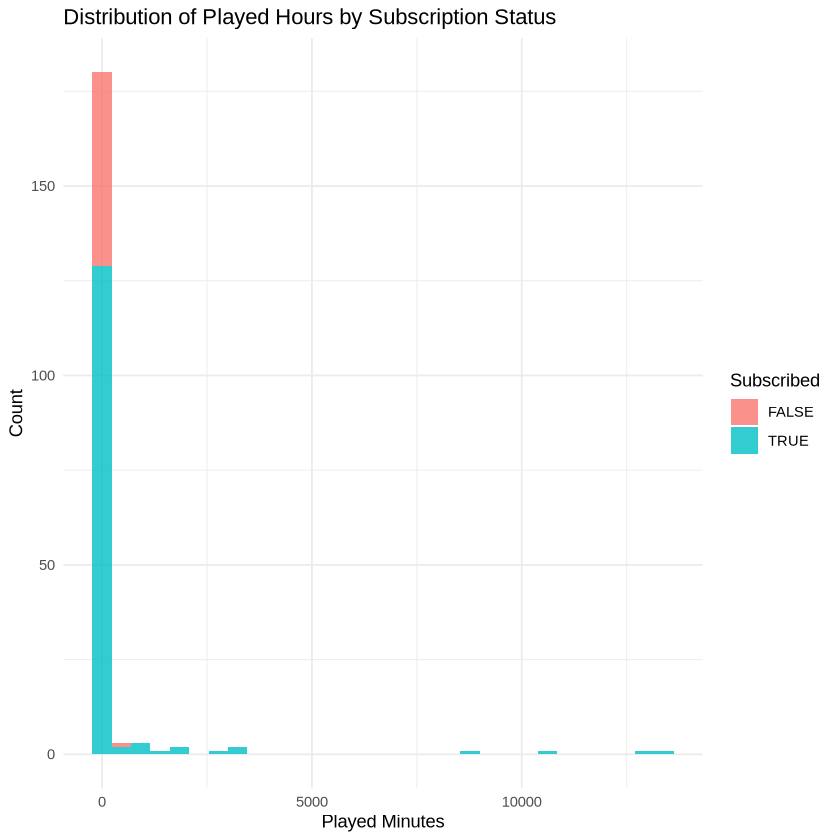

In [4]:
graph_playedtime<-players|>
ggplot(aes(x = played_minutes, fill = as.factor(subscribe))) +
  geom_histogram(bins=30, alpha=0.8,position = "stack") +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Played Minutes",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()
graph_playedtime

##### Distribution of Age by Subscription Status

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


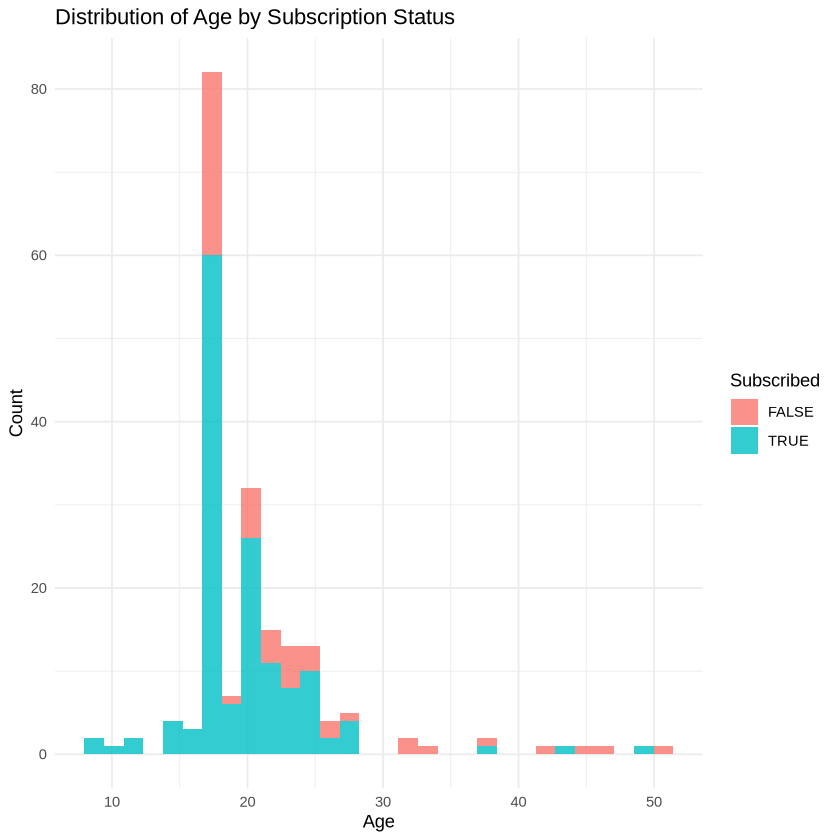

In [5]:
graph_age<-players|>
ggplot(aes(x = Age, fill = as.factor(subscribe))) +
  geom_histogram(bins=30, alpha=0.8,position = "stack") +
  labs(title = "Distribution of Age by Subscription Status",
       x = "Age",
       y = "Count",
       fill = "Subscribed") +
  theme_minimal()
graph_age

##### Distribution of Gender by Subscription Status

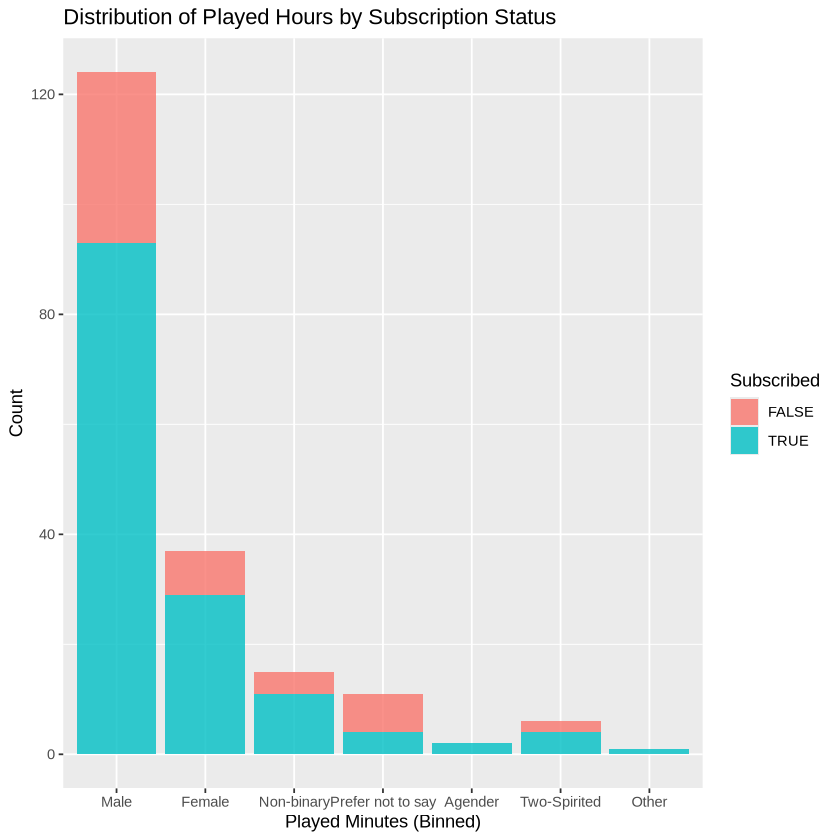

In [6]:
graph_gender <- players|>
  ggplot(aes(x = gender, fill = as.factor(subscribe))) +
  geom_bar(position = "stack", alpha = 0.8) +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Played Minutes (Binned)",
       y = "Count",
       fill = "Subscribed")

graph_gender

##### Distribution of Experience Level by Subscription Status

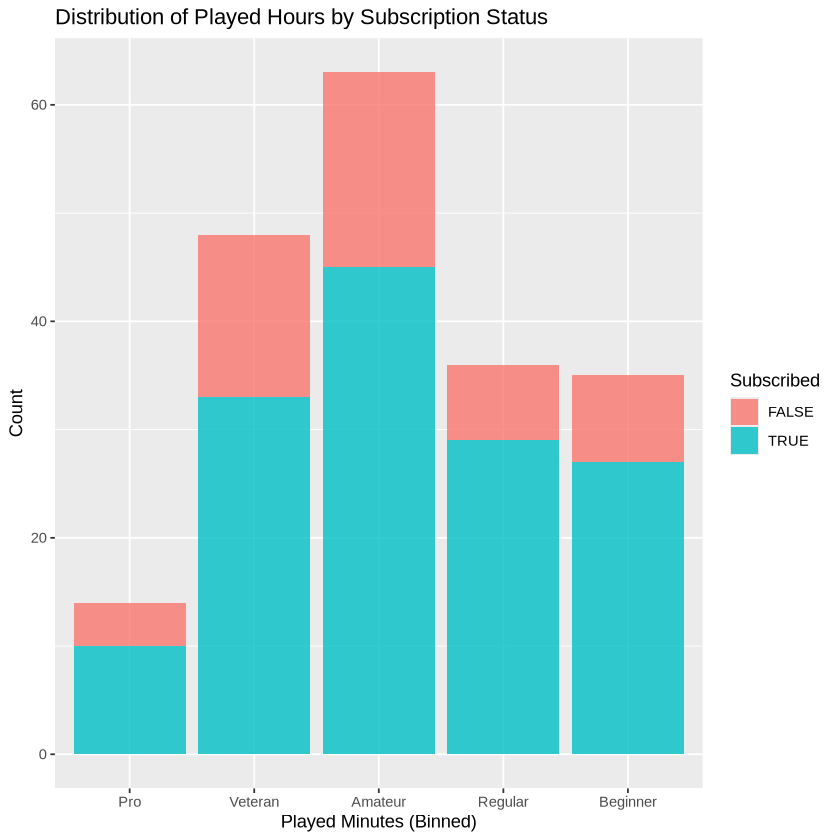

In [7]:
graph_experience <- players|>
  ggplot(aes(x = experience, fill = as.factor(subscribe))) +
  geom_bar(position = "stack", alpha = 0.8) +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Played Minutes (Binned)",
       y = "Count",
       fill = "Subscribed")

graph_experience

#### Data Analysis

#### Part 1: Data Splitting

In [8]:
set.seed(1)
players_split<-initial_split(players,prop=0.8, strata=subscribe)
players_train<-training(players_split)
players_test<-testing(players_split)
glimpse(players_train)
glimpse(players_test)

Rows: 156
Columns: 5
$ experience     <fct> Veteran, Amateur, Amateur, Amateur, Veteran, Amateur, V…
$ subscribe      <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ played_minutes <dbl> 0, 0, 0, 6, 6, 0, 84, 0, 0, 0, 12, 0, 0, 0, 0, 0, 162, …
$ gender         <fct> Male, Male, Male, Female, Male, Prefer not to say, Pref…
$ Age            <dbl> 17, 21, 22, 17, 18, 33, 25, 24, 23, 42, 37, 28, 17, 17,…
Rows: 40
Columns: 5
$ experience     <fct> Amateur, Regular, Amateur, Regular, Amateur, Beginner, …
$ subscribe      <fct> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, …
$ played_minutes <dbl> 42, 6, 0, 0, 12, 0, 18, 0, 6, 12, 0, 6, 54, 6, 30, 0, 0…
$ gender         <fct> Female, Male, Female, Female, Male, Female, Male, Male,…
$ Age            <dbl> 21, 21, 17, 19, 22, 17, 8, 23, 23, 17, 17, 17, 18, 22, …


#### Part 2: Classification Based on Experience Level (Tiffany)

[1] 53

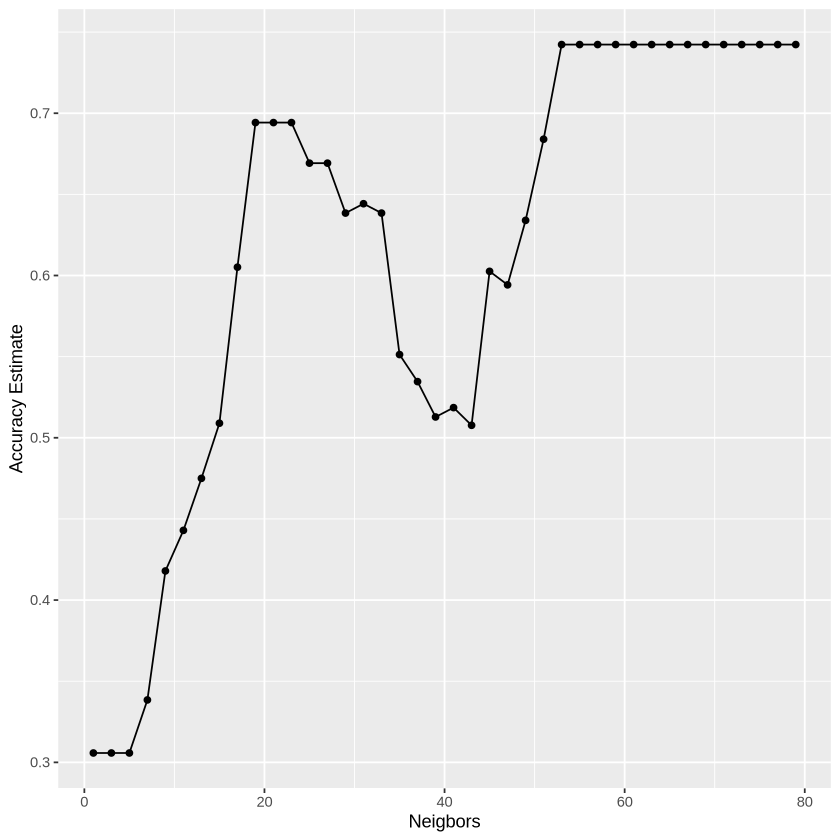

In [9]:
set.seed(2)
#tuning
tune_split<-initial_split(players_train,prop=0.8,strata=subscribe)
subtrain<-training(tune_split)
validation<-testing(tune_split)

knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

experience_recipe<-recipe(subscribe~experience,data=subtrain)

player_vfold<-vfold_cv(subtrain,v=5, strata=subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 80,by=2))

knn_results<-workflow()|>
add_recipe(experience_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=player_vfold, grid=k_vals)|>
collect_metrics()

best_k<-best_k <- knn_results |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

accuracies<-knn_results|>
filter(.metric=='accuracy')

cross_val_plot<-ggplot(accuracies, aes(x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x="Neigbors",y="Accuracy Estimate")

cross_val_plot

K= 53 gives the highest accuracy, should use k within this range

In [10]:
knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=53)|>
set_engine("kknn")|>
set_mode("classification")

players_recipe<-recipe(subscribe~experience,data=players_train)

knn_fit<-workflow()|>
add_recipe(players_recipe)|>
add_model(knn_spec)|>
fit(data=players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(53,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5
Best kernel: rectangular
Best k: 53

In [11]:
experience_prediction<-predict(knn_fit,players_test)|>
bind_cols(players_test)

experience_prediction|>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

experience_prediction |> pull(subscribe) |> levels()
experience_prediction|>
    precision(truth = subscribe, estimate = .pred_class, event_level="second")

experience_prediction|>
    recall(truth =subscribe , estimate = .pred_class, event_level="second")

confusion<-experience_prediction|>
conf_mat(truth=subscribe,estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.475


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6538462


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5862069


          Truth
Prediction FALSE TRUE
     FALSE     2   12
     TRUE      9   17

#### Part 2: Classification Based on Played Time (Emily)

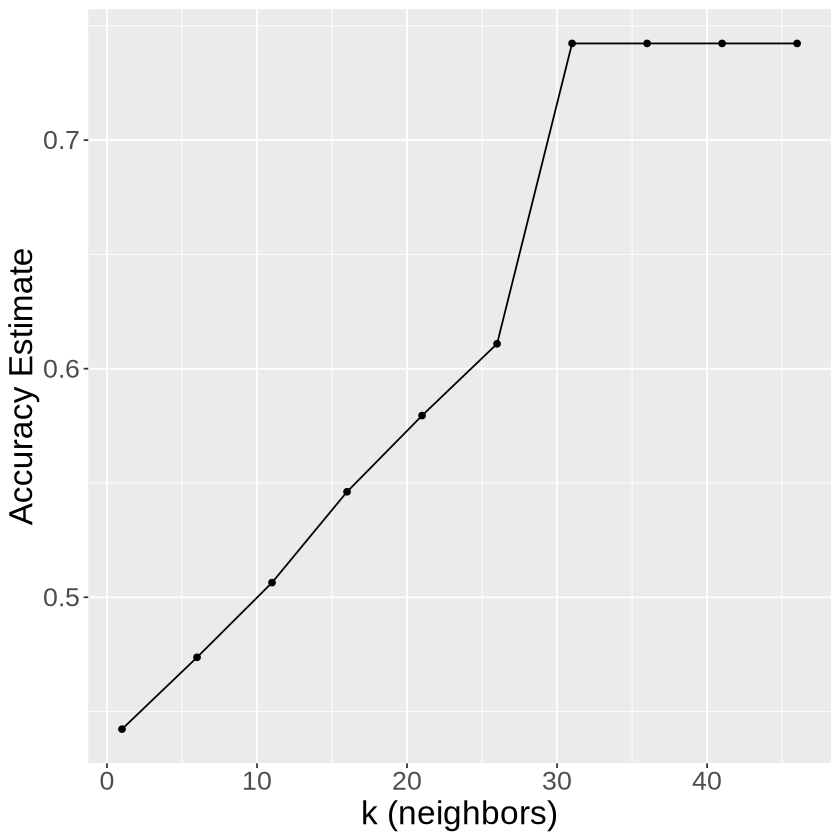

In [12]:
set.seed(999)

# create the 20/80 split of the training data into training and validation
tune_split_played_min <- initial_split(players_train, prop = 0.8, strata = subscribe)
played_min_subtrain <- training(tune_split_played_min)
played_min_validation <- testing(tune_split_played_min)

# create the standardization recipe based on the subtrain data
played_min_recipe <- recipe(subscribe ~ played_minutes, data = played_min_subtrain) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

#create a model specification
knn_spec_played_min <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

k_values <- tibble(neighbors = seq(from = 1, to = 50,by = 5))

vfolds <- vfold_cv(played_min_subtrain, v = 5, strata = subscribe)

played_min_workflow <- workflow() |>
        add_recipe(played_min_recipe) |>
        add_model(knn_spec_played_min) |>
        tune_grid(resamples = vfolds, grid = k_values) 

metrics <- collect_metrics(played_min_workflow)

#plot graph to visualize the accuracy of different k values
played_min_cross_val_plot <- metrics |>
                filter(.metric == "accuracy") |>
                mutate(neighbors = as.numeric(neighbors), mean = as.numeric(mean)) |>
                drop_na() |>
                ggplot(aes(x = neighbors, y = mean)) +
                      geom_point() +
                      geom_line() +
                      labs(x = "k (neighbors)", y = "Accuracy Estimate")+
                      theme(text = element_text(size = 20))
played_min_cross_val_plot

In [13]:
#determine the best k value (greatest accuracy)
best_k <- metrics |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 31

In [14]:
#retrain knn on entire training model

players_recipe <- recipe(subscribe ~ played_minutes, data = players_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 31)|>
        set_engine("kknn")|>
        set_mode("classification")

knn_fit <- workflow()|>
        add_recipe(players_recipe)|>
        add_model(knn_spec_new)|>
        fit(data=players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(31,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4038462
Best kernel: rectangular
Best k: 31

In [15]:
played_test_predictions <- predict(knn_fit, players_test) |>
        bind_cols(players_test) 

played_test_accuracy <- played_test_predictions |>
        metrics(truth = subscribe, estimate = .pred_class) |>
        filter(.metric == "accuracy") 
played_test_accuracy

played_test_precision <- played_test_predictions|>
        precision(truth = subscribe, estimate = .pred_class, event_level = "second")
played_test_precision

played_test_recall <- played_test_predictions|>
        recall(truth = subscribe , estimate = .pred_class, event_level = "second")
played_test_recall

played_min_confusion <- played_test_predictions|>
conf_mat(truth = subscribe, estimate = .pred_class)
played_min_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7368421


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.4827586


          Truth
Prediction FALSE TRUE
     FALSE     6   15
     TRUE      5   14

#### Part 2: Classification Based on Gender (Zoey)

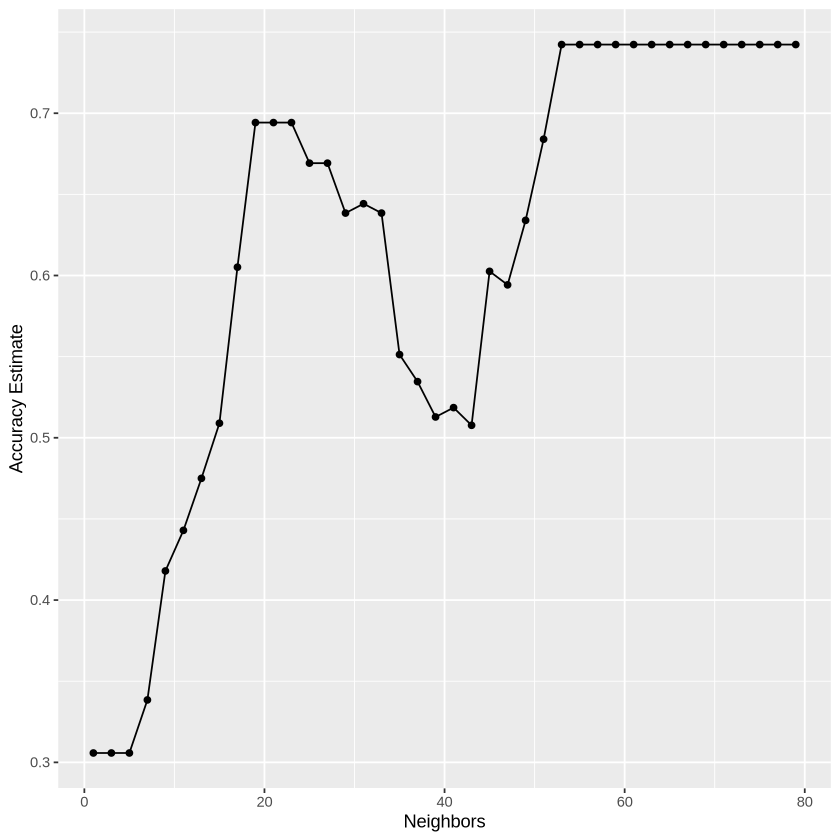

In [16]:
set.seed(1000)

tune_split_gender <- initial_split(players_train, prop = 0.8, strata = subscribe)
subtrain_gender <- training(tune_split_gender)
validation_gender <- testing(tune_split_gender)

recipe_gender <- recipe(subscribe ~ gender, data = subtrain_gender)

knn_spec_gender <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

vfold_gender <- vfold_cv(subtrain_gender, v = 5, strata = subscribe)

k_vals_gender <- tibble(neighbors = seq(from = 1, to = 80, by = 5))

knn_results_gender <- workflow() |>
    add_recipe(recipe_gender) |>
    add_model(knn_spec_gender) |>
    tune_grid(resamples = vfold_gender, grid = k_vals_gender) |>
    collect_metrics()

accuracies_gender <- knn_results_gender |>
    filter(.metric == "accuracy")

accuracy_vs_k_gender <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k_gender

In [17]:
best_k_gender <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

best_k_gender

[1] 53

In [18]:
players_recipe_gender <- recipe(subscribe ~ gender, data = players_train)

knn_spec_gender_players <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_gender) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_gender <- workflow() |>
    add_recipe(players_recipe_gender) |>
    add_model(knn_spec_gender_players) |>
    fit(data = players_train)

knn_fit_gender

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(53,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3974359
Best kernel: rectangular
Best k: 53

In [25]:
gender_test_predictions <- predict(knn_fit_gender, players_test) |>
    bind_cols(players_test)

gender_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

gender_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")

gender_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

gender_confusion <- gender_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

gender_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6206897


          Truth
Prediction FALSE TRUE
     FALSE     2   11
     TRUE      9   18

#### Part 2: Classification Based on Age (Brandon)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(31,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2662338
Best kernel: rectangular
Best k: 31

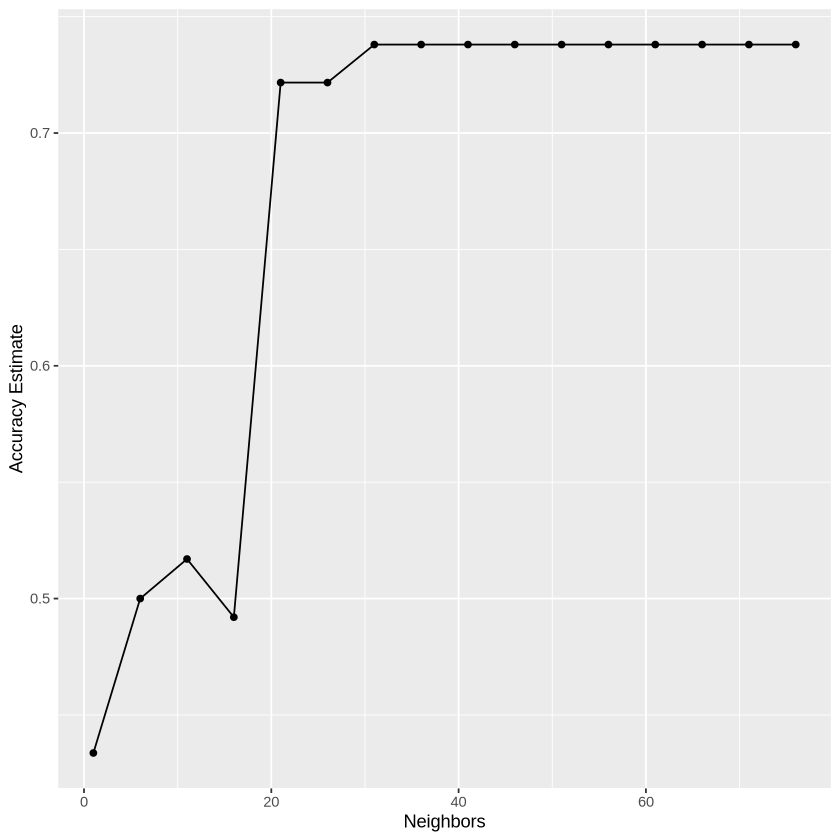

In [41]:
# set seed
set.seed(1050)

players_train <- players_train |> 
  filter(!is.na(Age))

# Split the training data for tuning and validation (stratified by subscribe)
tune_split_age <- initial_split(players_train, prop = 0.8, strata = subscribe)
subtrain_age   <- training(tune_split_age)
validation_age <- testing(tune_split_age)

# Create a recipe for predicting subscribe using age
recipe_age <- recipe(subscribe ~ Age, data = subtrain_age)

# KNN Model
knn_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

player_vfold_age <- vfold_cv(subtrain_age, v = 5, strata = subscribe)

# k values to try
k_vals_age <- tibble(neighbors = seq(from = 1, to = 80, by = 5))

knn_results_age <- workflow() |>
  add_recipe(recipe_age) |>
  add_model(knn_spec_age) |>
  tune_grid(resamples = player_vfold_age, grid = k_vals_age) |>
  collect_metrics()

accuracies_age <- knn_results_age |>
  filter(.metric == "accuracy")

# Plot cross-validation accuracy vs. neighbors
cross_val_plot_age <- ggplot(accuracies_age, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")
  
cross_val_plot_age

# Determine best k
best_k_age <- accuracies_age |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)


players_recipe_age <- recipe(subscribe ~ Age, data = players_train)

# Final KNN model
knn_spec_age_players <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_age) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit
knn_fit_age <- workflow() |>
  add_recipe(players_recipe_age) |>
  add_model(knn_spec_age_players) |>
  fit(data = players_train)

knn_fit_age

In [42]:
# Make prediction
age_prediction <- predict(knn_fit_age, new_data = players_test) |>
  bind_cols(players_test)

# Evaluate the accuracy metric
age_prediction |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

age_prediction |>
  pull(subscribe) |>
  levels()

age_prediction |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

age_prediction |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

# Confusion matrix
age_confusion <- age_prediction |>
  conf_mat(truth = subscribe, estimate = .pred_class)

age_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7837838


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


          Truth
Prediction FALSE TRUE
     FALSE     3    0
     TRUE      8   29

### How Each Feature Differ Between Various Player Types?

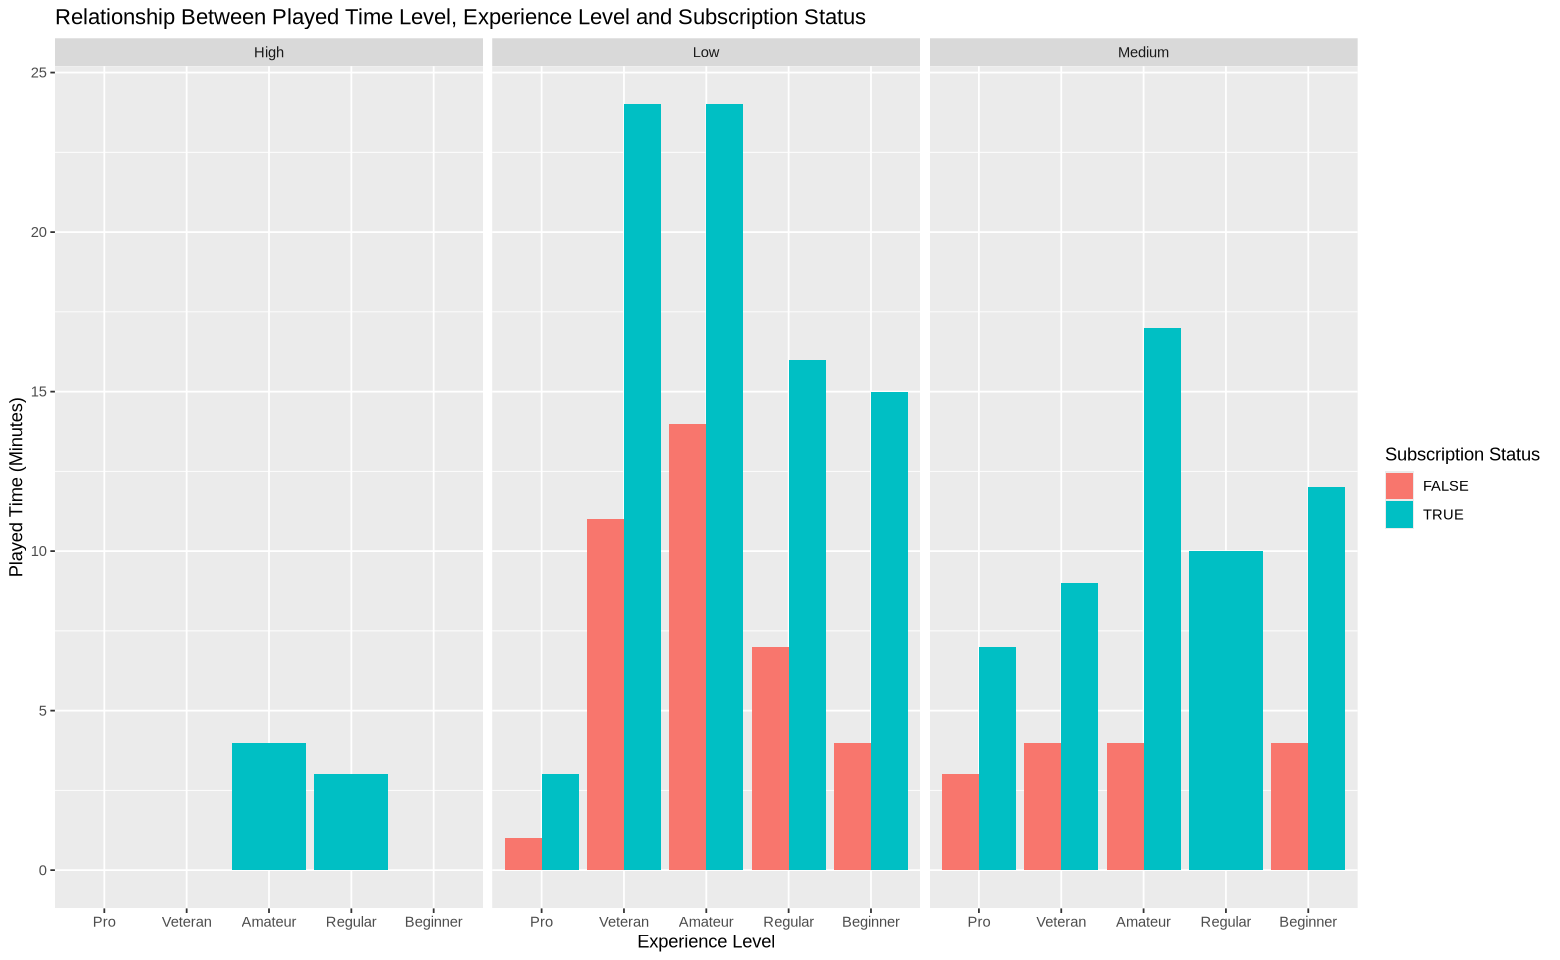

In [65]:
options(repr.plot.width = 13, repr.plot.height = 8)

# Put different Played Time into Different Categories
players_time_categories <- players |> 
    mutate(time_categories = ifelse(played_minutes < 10, "Low", ifelse(played_minutes > 2000, "High", "Medium")))

played_time_experience <- players_time_categories |>
    ggplot(aes(x = experience, fill = as.factor(subscribe))) +
    geom_bar(position = "dodge") +
    facet_wrap(~ time_categories) + 
    xlab("Experience Level") + 
    ylab("Played Time (Minutes)") + 
    ggtitle("Relationship Between Played Time Level, Experience Level and Subscription Status") + 
    labs(fill = "Subscription Status")

played_time_experience

Players with less than 2000 minutes playing time in the Amateur and Regular experience levels are more likely to subscribe. Very few high-playtime players are subscribers.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


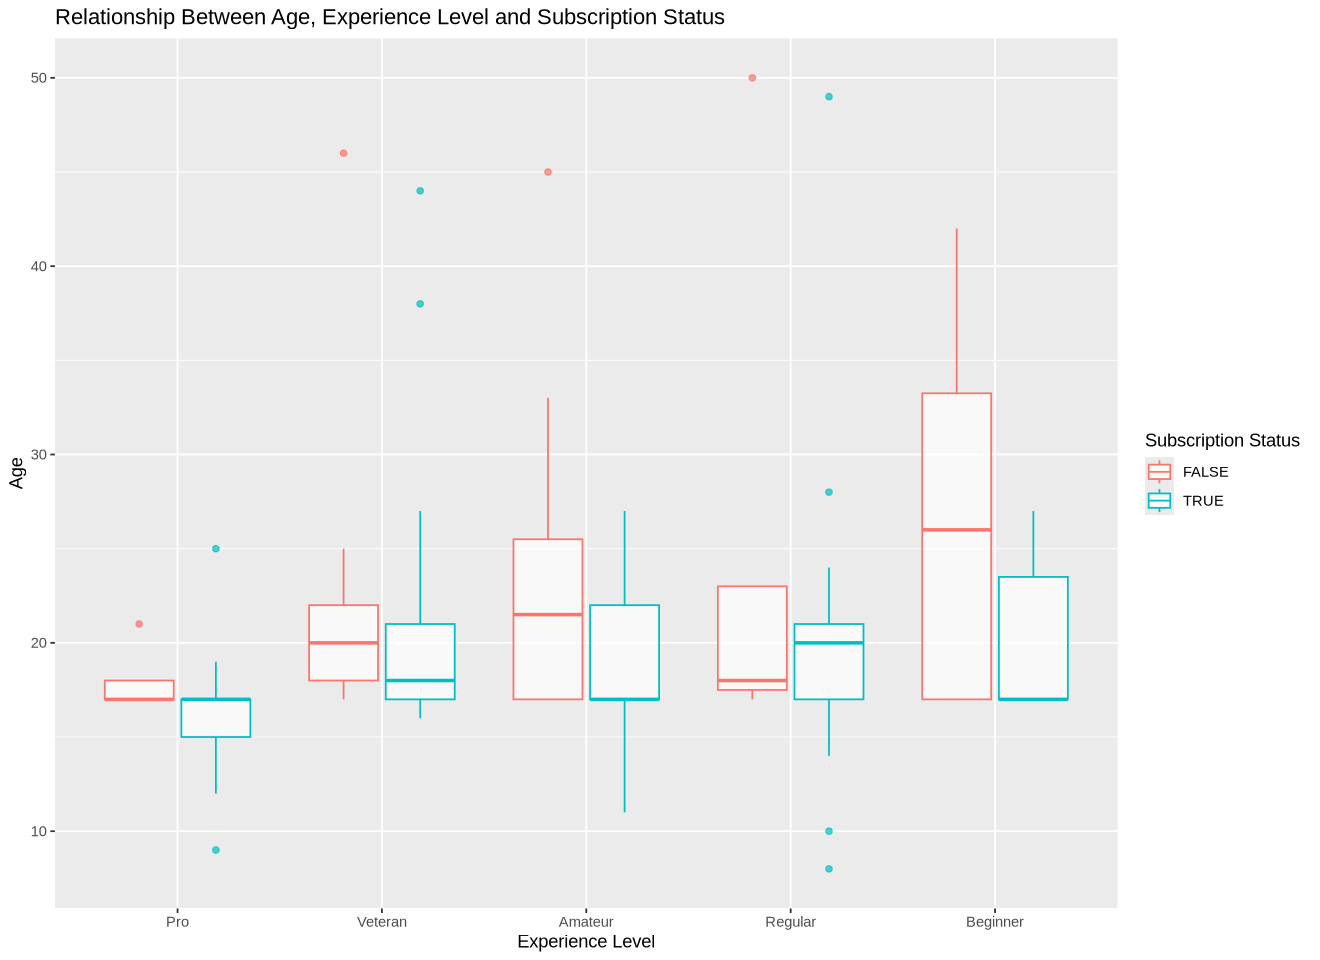

In [54]:
options(repr.plot.width = 11, repr.plot.height = 8)

age_experience <- players |>
    ggplot(aes(x = experience, y = Age, color = as.factor(subscribe))) +
    geom_boxplot(alpha = 0.7) + 
    xlab("Experience Level") + 
    ylab("Age") + 
    ggtitle("Relationship Between Age, Experience Level and Subscription Status") + 
    labs(color = "Subscription Status")

age_experience

Age distribution is fairly similar across all experience levels, but the players who subscribed the game-related newsletter tend to be slightly younger, especially among Beginners and Amateurs.

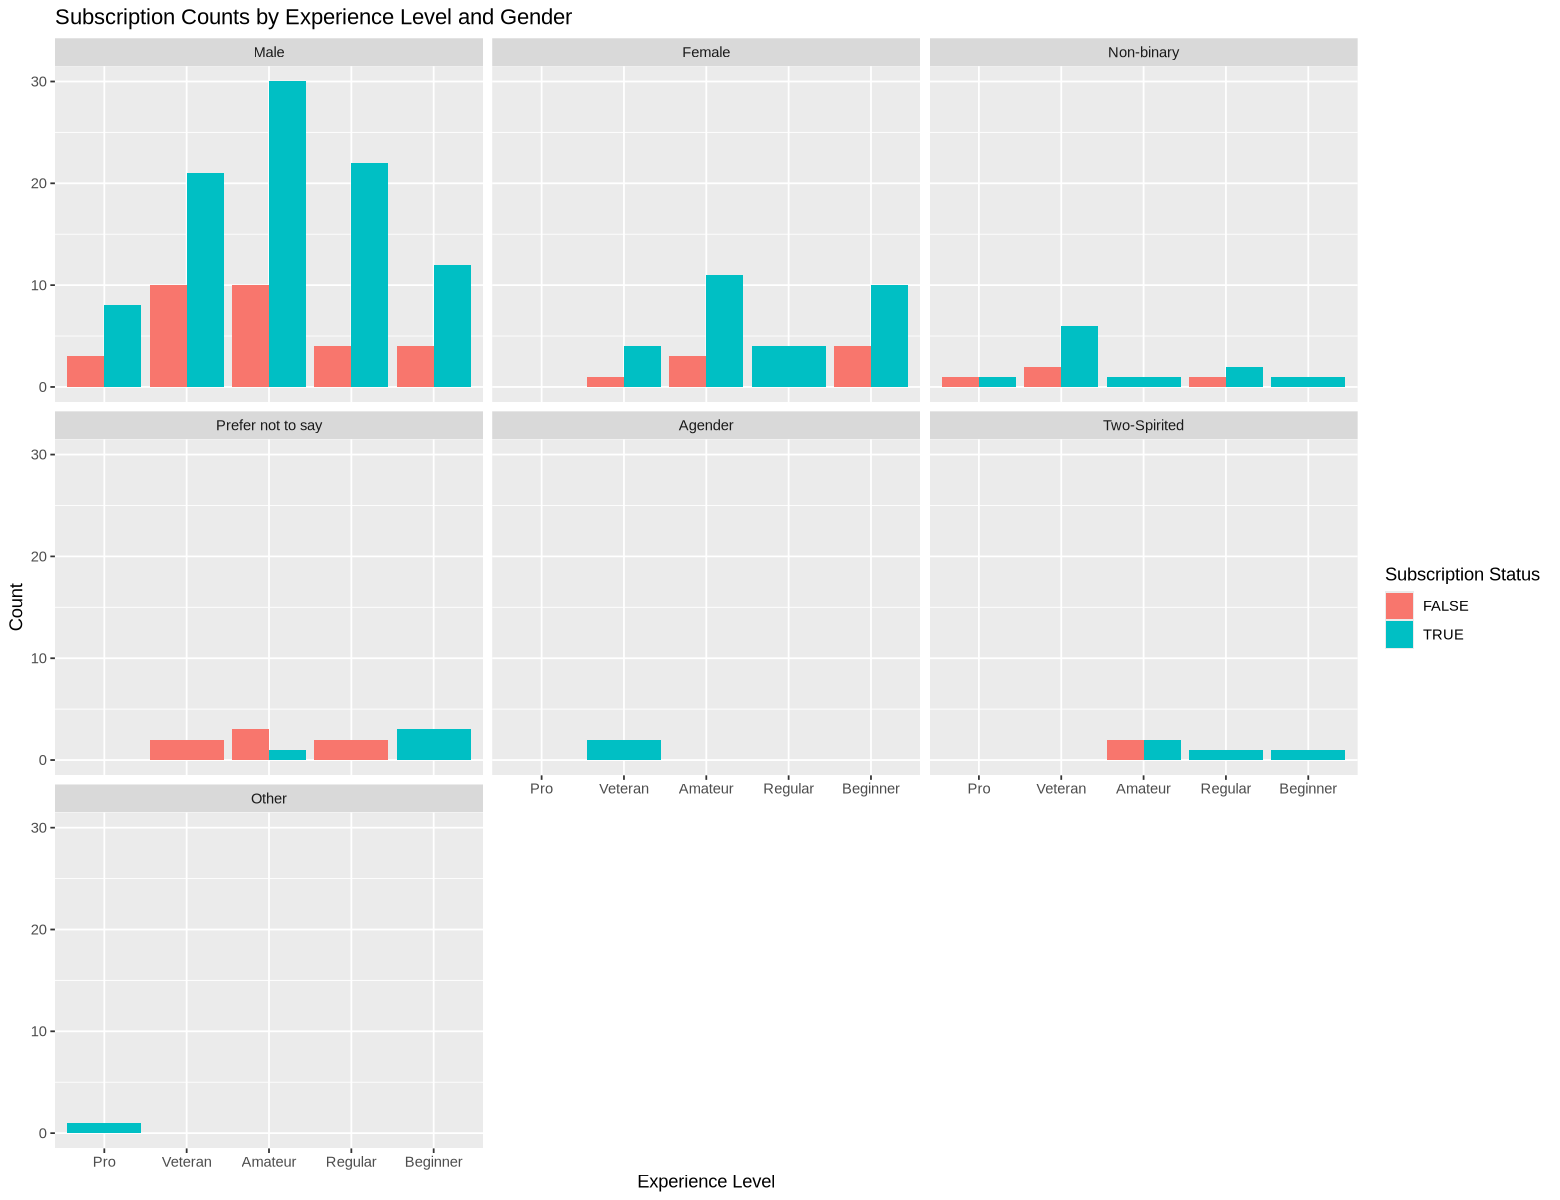

In [52]:
options(repr.plot.width = 13, repr.plot.height = 10)

gender_experience <- players |>
    ggplot(aes(x = experience, fill = as.factor(subscribe))) +
    geom_bar(position = "dodge") +
    facet_wrap(~ gender) + 
    xlab("Experience Level") + 
    ylab("Count") + 
    ggtitle("Subscription Counts by Experience Level and Gender") + 
    labs(fill = "Subscription Status")

gender_experience

Amateur and Regular players have the highest number of subscriptions across most gender groups, with Male and Female players being the most represented.

#### Conclusion of How Each Feature Differ Between Various Player Types?

Based on our visual analysis, player experience level emerged as the most obvious differentiator in subscription status. While we explored variations in played time, age, and gender across different experience groups, one pattern stood out: **Amateur and Regular players were consistently more likely to subscribe to the game-related newsletter across all dimensions.**

Specifically, these moderately experienced players tend to have a moderate level of engagement with the game (known through time spent playing), are usually slightly younger, and across different gender groups. In contrast, beginners may not know enough about the game to engage with the subscription, while veterans and pros may not find the newsletter content relevant to the game itself, possibly because they already have their own deep understanding of the game.

This insight is particularly useful and valuable from a strategic perspective. If the goal is to increase subscriptions, it will be most effective to target Amateur and Regular players, especially those who play moderately long and at a younger age. Tailoring marketing efforts to this group is likely to yield the highest returns, as they represent the most engaged and receptive group of players to subscribe to newsletters.

Eventually, this suggests that player type, defined by experience level, interacts with other characteristics such as age, time spent playing, and gender, but remains the most obvious characteristic that distinguishes subscription tendency.